# Importando depenências

In [1]:
import itertools as it
import matplotlib.pyplot as plt
import networkx as nx

# Declaração da Classe do Grafo

In [2]:
class Graph:
    def __init__(self):
        self.graph = dict()

    def addEdge(self, node1, node2, edgeName):
        if node1 not in self.graph:
            self.graph[node1] = []
        if node2 not in self.graph:
            self.graph[node2] = []

        self.graph[node1].append((node2, str(edgeName)))
        

    def printGraph(self):
        for source, destination in self.graph.items():
            print(f"{source}-->{destination}")
    
    
    def BFS_shortest_path(self, node1, node2):
        path_list = [[node1]]
        edge_list = [[]]

        final_artists_path = []
        final_songs_path = []
        paths_counter = 0
        
        path_index = 0
        
        # To keep track of previously visited nodes
        previous_nodes = {node1}
        if node1 == node2:
            return path_list[0]
            
        while path_index < len(path_list):
            current_path = path_list[path_index]
            current_edges = edge_list[path_index]
            last_node = current_path[-1]
            next_nodes = self.graph[last_node]
            
            # Search goal node
            for n_node in next_nodes:
                if node2 == n_node[0]:
                    current_edges.append(n_node[1])
                    current_path.append(n_node[0])
                    
                    final_artists_path.append(current_path)
                    final_songs_path.append(current_edges)
                    paths_counter += 1

                    if paths_counter == 3:
                        return final_artists_path, final_songs_path
            
            # Add new paths
            for next_node in next_nodes:
                if not next_node in previous_nodes:
                    n_node = next_node[0]
                    n_edge = next_node[1]

                    new_path = current_path[:]
                    new_path.append(n_node)

                    new_path_edge = current_edges[:]
                    new_path_edge.append(n_edge)
                    
                    path_list.append(new_path)
                    edge_list.append(new_path_edge)
                    
                    # To avoid backtracking
                    previous_nodes.add(next_node)
            
            # Continue to next path in list
            path_index += 1
        
        
        if paths_counter > 0:
            return final_artists_path, final_songs_path  
        else:
            return []


# Carregando arquivo

In [3]:
g = Graph()

with open("grafos.txt", encoding="utf8") as f:
    lines = f.readlines()

# Adicionando artistas e músicas ao grafo

In [4]:
perm_set = set()

for i in range(len(lines)):
    edge, nodes = lines[i].replace("'", '').replace('"', '').split('|')
    nodesList = nodes.replace('\n', '').split(',')
    perm = it.permutations(nodesList, 2)
    

    for nodeCombination in list(perm):
        if nodeCombination not in perm_set:
            perm_set.add(nodeCombination)
            g.addEdge(nodeCombination[0], nodeCombination[1], edge)

# Encontrando menor caminho entre artistas

## Para trocar os artistas pesquisados, basta trocar os parâmetros da função *BFS_shortest_path()*

In [5]:
path_singers, path_songs = g.BFS_shortest_path("Anitta", "Miley Cyrus")

print(path_singers)
print(path_songs)

[['Anitta', 'Swae Lee', 'Miley Cyrus'], ['Anitta', 'Major Lazer', 'Swae Lee', 'Miley Cyrus'], ['Anitta', 'Major Lazer', 'Dua Lipa', 'Miley Cyrus']]
[['Poquito', 'Party Up The Street'], ['Make It Hot', 'Walking (feat. Swae Lee & Major Lazer)', 'Party Up The Street'], ['Make It Hot', 'My Love (feat. Major Lazer, WizKid, Dua Lipa)', 'Prisoner (feat. Dua Lipa)']]


# Configurando grafo para representação

Importante ressaltar que a estrutura pronta de grafos presente na biblioteca *networkx* foi utilizada apenas para gerar a imagem representativa dos grafos encontrados pela BFS shortest path

In [6]:
G = []
for n in range(3):
    G.append(nx.Graph())
    for i in range(len(path_singers[n])):
        try:
            G[n].add_edge(path_singers[n][i], path_singers[n][i+1], song=path_songs[n][i])
        except:
            break

# Plot

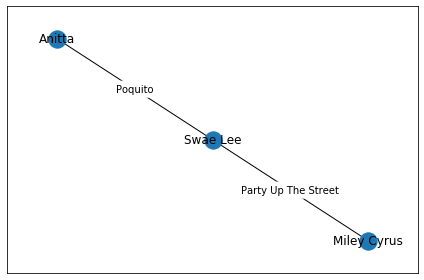

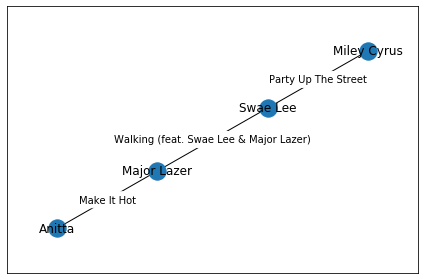

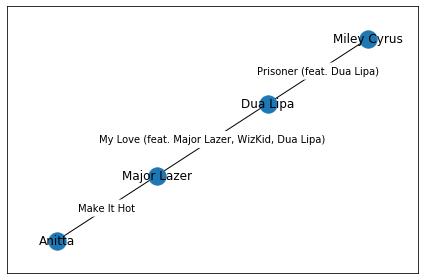

In [7]:
for i in G:
    songs = nx.get_edge_attributes(i,'song')
    pos = nx.spring_layout(i)
    nx.draw_networkx(i, pos)
    nx.draw_networkx_edge_labels(i, pos, edge_labels = songs, rotate=False)
    plt.margins(x=0.10, y=0.10, tight=True)
    plt.tight_layout()
    plt.show()